# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

# Introduction

In the realm of data analysis, regression acts as a guiding light. It's a mathematical tool that helps us identify patterns in data, much like connecting the dots on a chart. One of the fundamental forms is linear regression, often represented by the formula:


###                  y = mx + b


Here,y represents the dependent variable, x the independent variable,m the slope derived from the data, and b the intercept.

This method enables us to uncover relationships between different variables and make informed predictions about future outcomes. By understanding these patterns, we gain valuable insights that drive decision-making in various fields.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

Importing Essential Libraries

To embark on our journey of data analysis and predictive modeling for the Electricity Shortfall Challenge, we rely on a set of powerful libraries that form the backbone of our data-driven exploration. Let's briefly discuss these libraries:

Pandas: This library is our Swiss army knife for data manipulation. It allows us to load, clean, and transform data effortlessly, providing a solid foundation for our analysis.

NumPy: For numerical operations, NumPy is indispensable. It empowers us to perform mathematical operations on our data efficiently.

Matplotlib and Seaborn: These visualization libraries enable us to create insightful plots and graphs, helping us visualize trends and patterns in the data.

Scikit-Learn (sklearn): This is our workhorse for data preparation and modeling. It offers an array of tools for splitting data, scaling features, building regression models, and evaluating their performance.

In [41]:
# Libraries for data loading, data manipulation, and data visualization
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns 

# Libraries for data preparation and model building
from sklearn.feature_selection import SelectKBest, f_regression


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 0

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

Our journey begins with data – the raw material for our analysis and modeling. We'll start by loading the data from the df_train file into a Pandas DataFrame. This tabular structure will serve as our canvas for exploration and model creation.

In [42]:
#Loading the data
df = pd.read_csv('df_train.csv')

df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [43]:
df = pd.read_csv("df_test.csv") # load the data
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

In our quest to unveil the hidden insights within our dataset, we embark on a journey known as Exploratory Data Analysis (EDA). This crucial phase allows us to understand, visualize, and draw preliminary conclusions from our data before diving into modeling.


### Data Exploration: 
   We begin by inspecting the dataset to comprehend its structure and contents.
   This involves checking the number of rows and columns, identifying variable types, and assessing the presence of missing data.

### Univariate Analysis: 
One variable at a time, we dig into the data. Descriptive statistics and visualizations help us grasp the distribution, central tendencies, and spread of each variable.

### Bivariate Analysis: 
Here, we explore relationships between pairs of variables. Scatter plots, correlation matrices, and other visualizations uncover connections, dependencies, and patterns.

### Multivariate Analysis:
Going beyond pairs, we extend our examination to multiple variables simultaneously. This helps us understand how variables interact and influence each other.

### Visualization: 
Visualizing our data is a potent tool for storytelling. We use libraries like Matplotlib and Seaborn to create charts and graphs that reveal insights and trends.

In [66]:
# print the coulmns
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [58]:
# look at data statistics
data_statistics = df.describe()

# Print the summary statistics
print(data_statistics)


         Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count   2920.000000        2920.000000     2920.000000          2920.000000   
mean   10222.500000           2.457820        0.067517             3.012785   
std      843.075718           1.774838        0.153381             1.996340   
min     8763.000000           0.000000        0.000000             0.000000   
25%     9492.750000           1.333333        0.000000             1.666667   
50%    10222.500000           2.000000        0.000000             2.333333   
75%    10952.250000           3.333333        0.000000             4.000000   
max    11682.000000          13.333333        1.600000            14.333333   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       2920.000000      2920.000000        2920.000000   
mean          67.123516        62.644463          43.355422   
std           20.611292        24.138393          30.486298   
min           11.666667         8.00

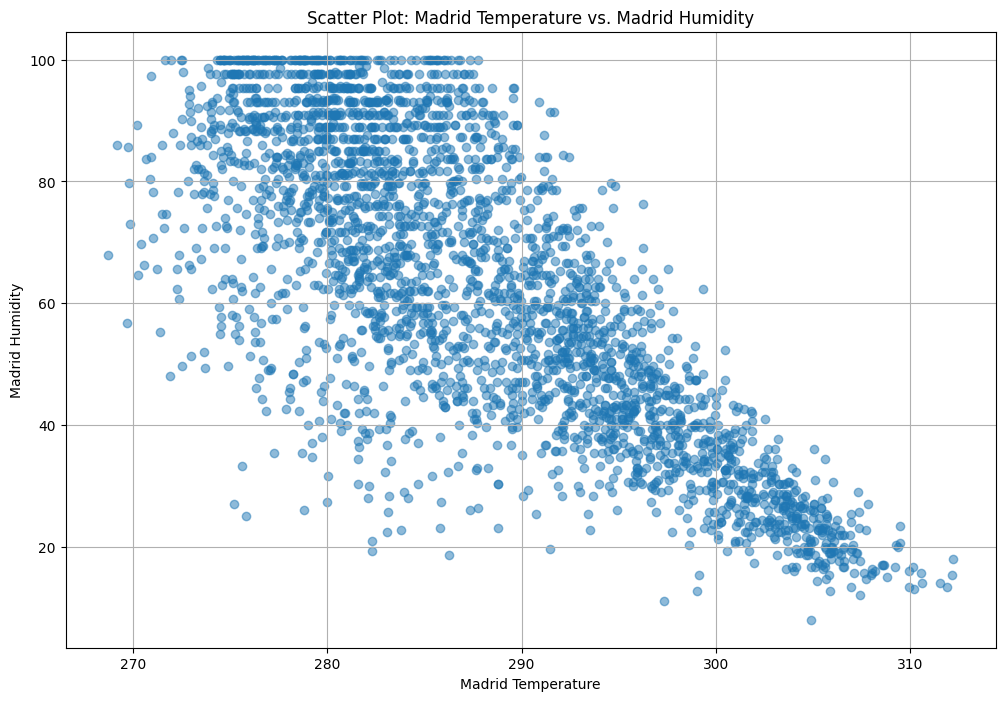

In [62]:
# plot relevant feature interactions

# Scatter plot of Madrid temperature vs. Madrid humidity
#plt.figure(figsize=(12, 8))
#plt.scatter(df['Madrid_temp'], df['Madrid_humidity'], alpha=0.5)
#plt.title('Scatter Plot: Madrid Temperature vs. Madrid Humidity')
#plt.xlabel('Madrid Temperature')
#plt.ylabel('Madrid Humidity')
#plt.grid(True)
#plt.show()


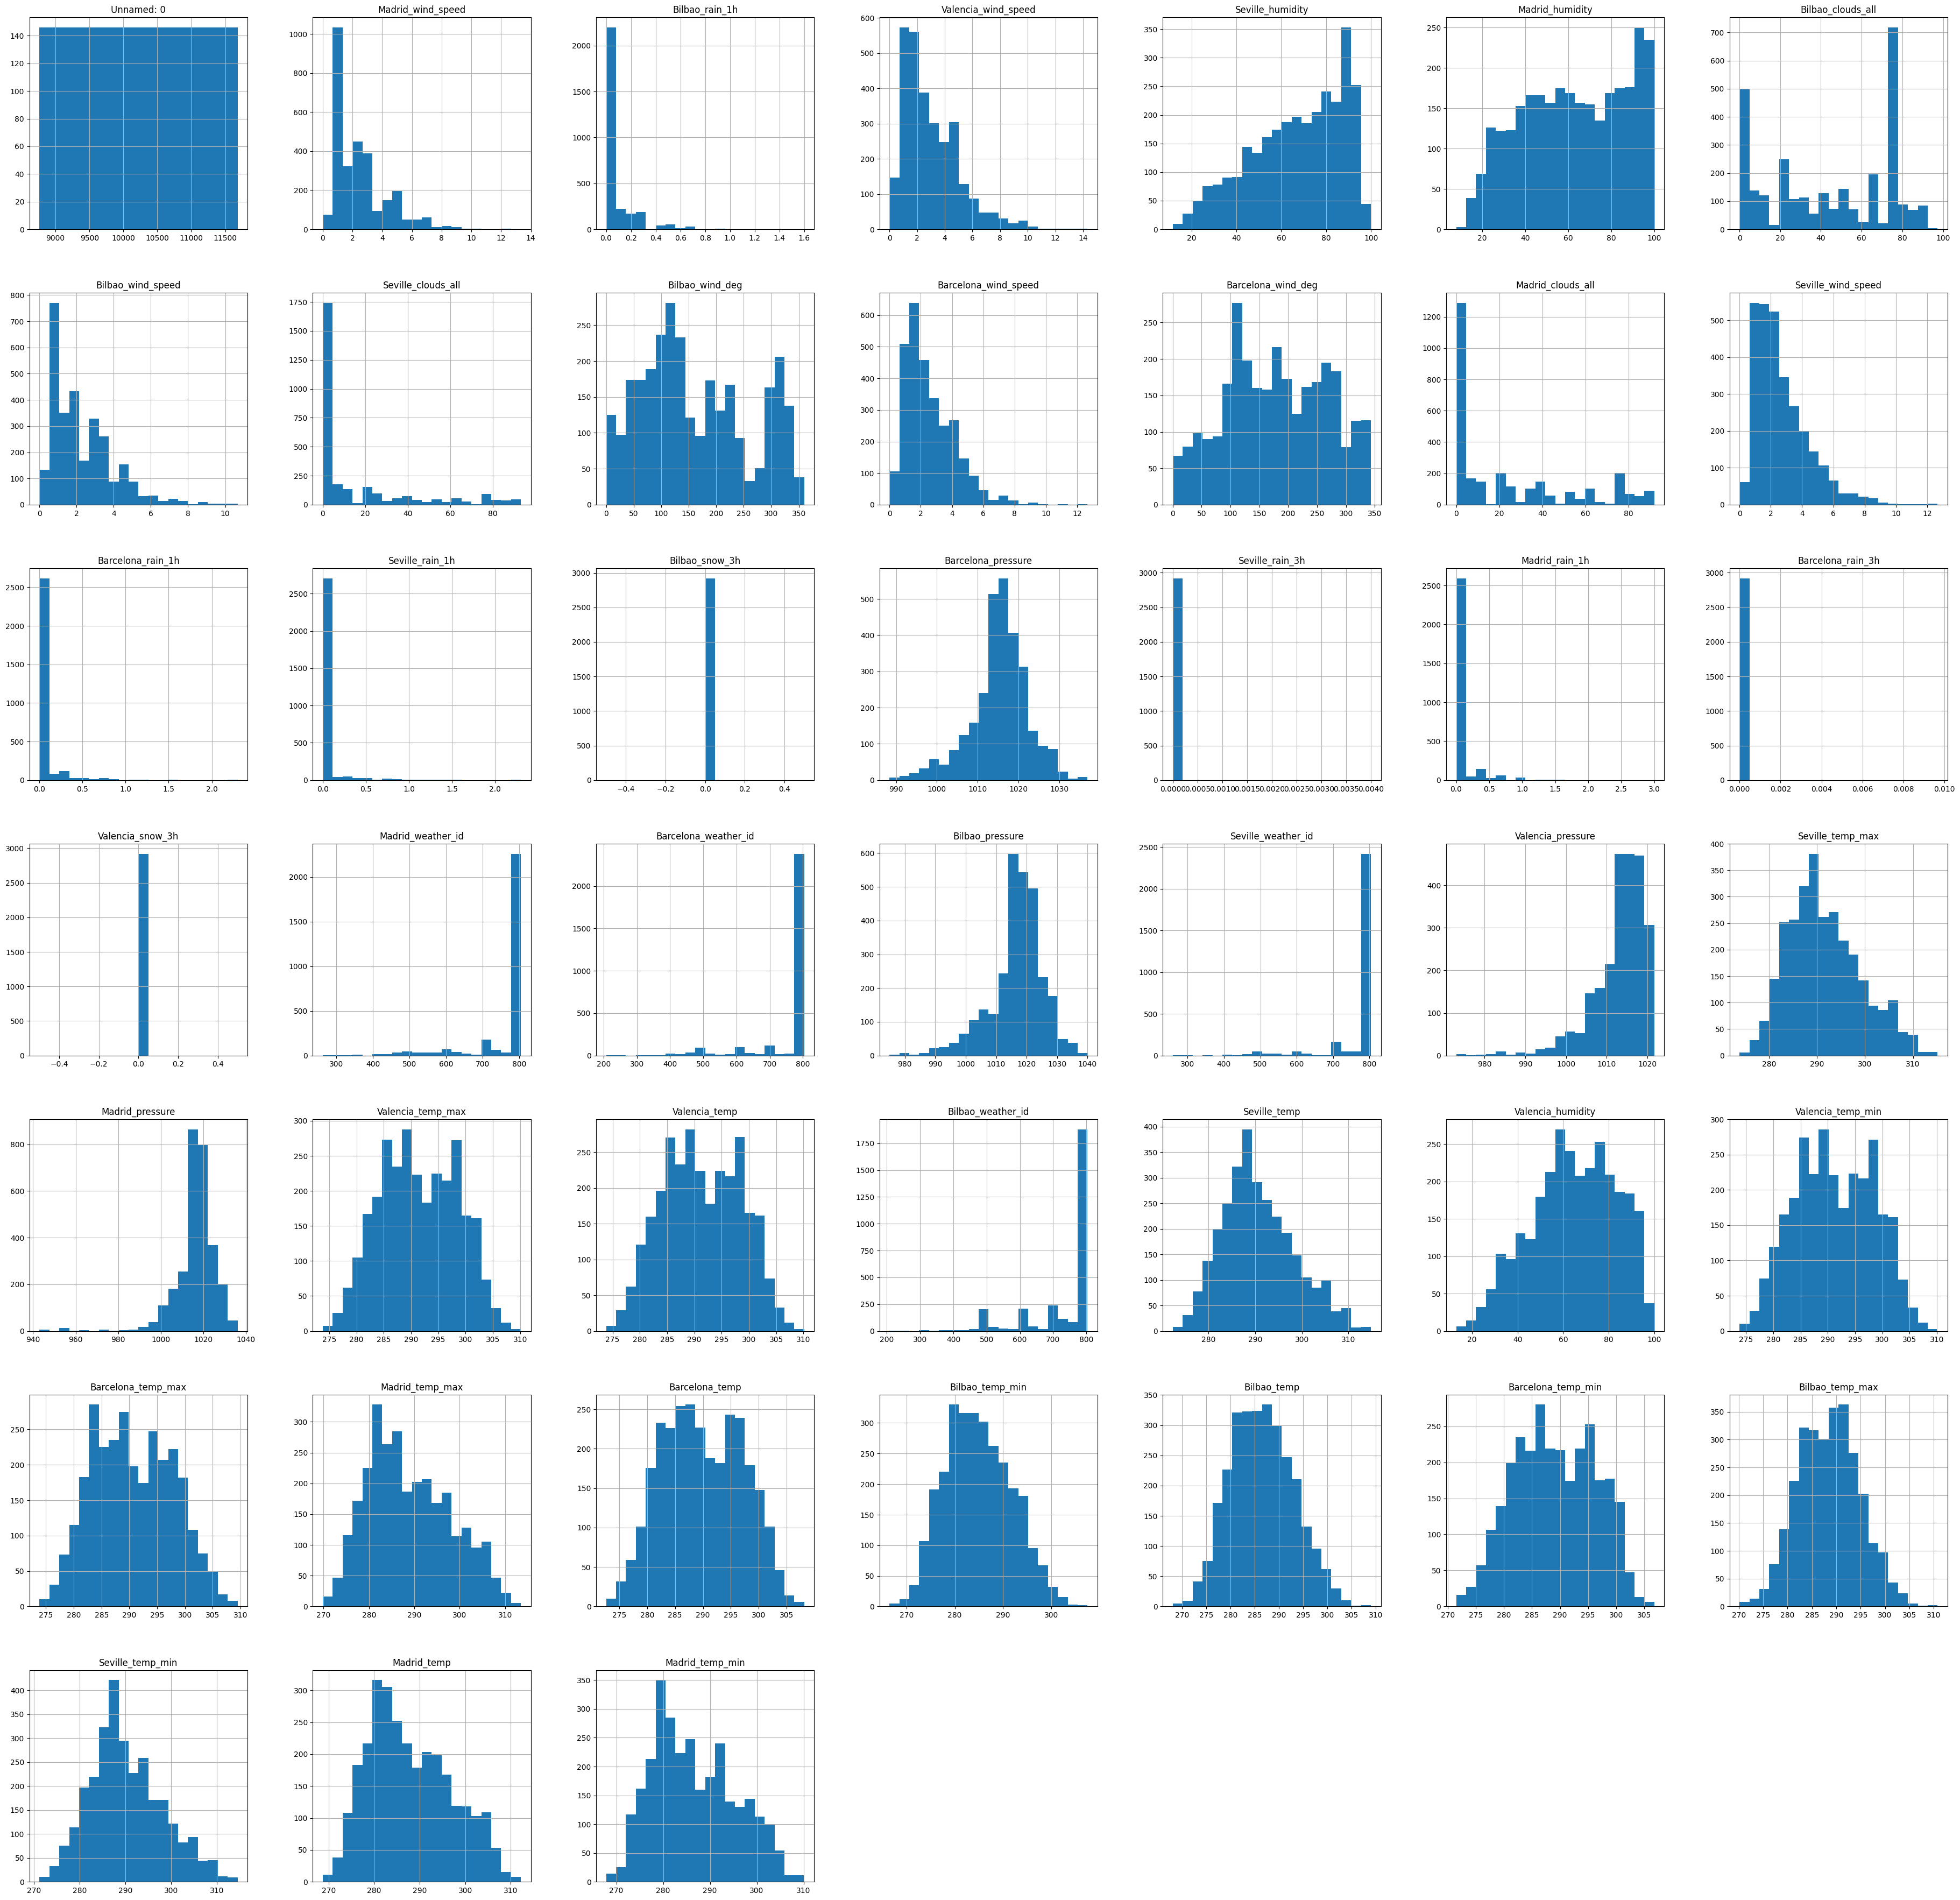

In [65]:
# Histograms for numerical columns
df.hist(bins=20, figsize=(46, 45))
plt.show()

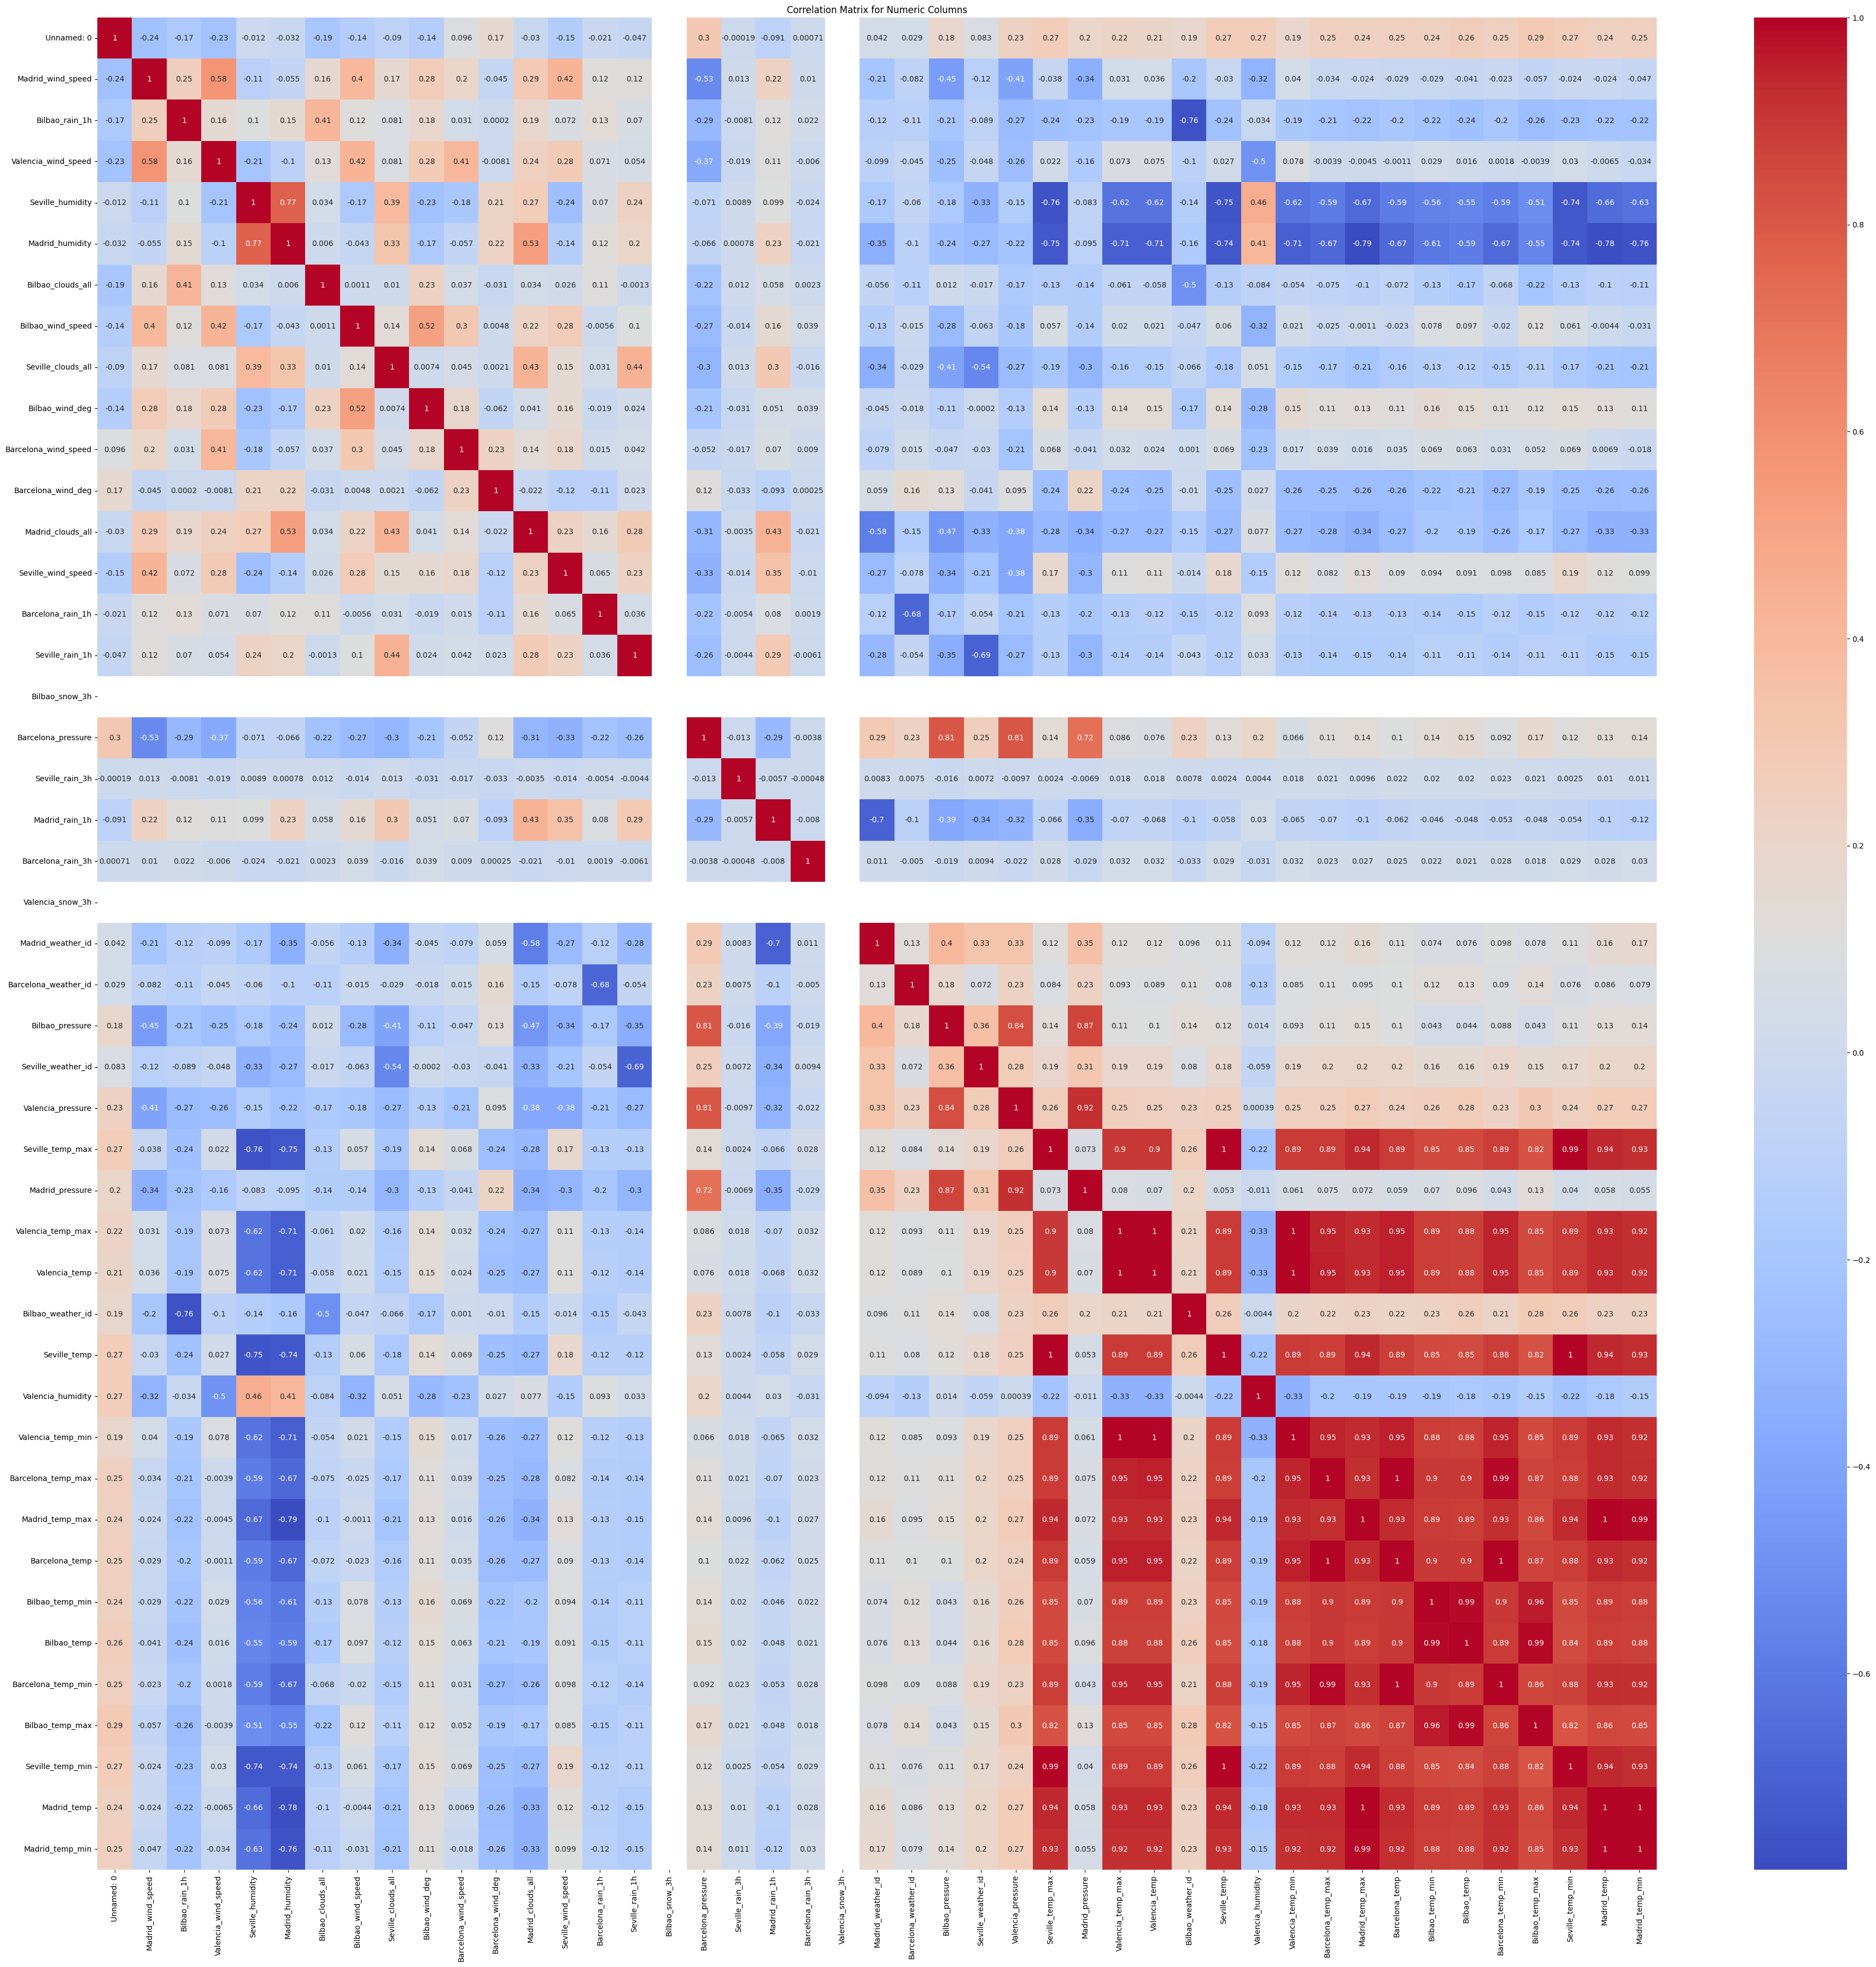

In [55]:
# evaluate correlation

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(46, 44))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()


In [63]:
# have a look at feature distributions

# Assuming 'df' is your DataFrame, and 'electricity_consumption' is the feature you want to examine
#plt.figure(figsize=(8, 6))
#sns.histplot(df['electricity_consumption'], kde=True)  # Create a histogram with a kernel density estimate (KDE)
#plt.title('Distribution of Electricity Consumption')
#plt.xlabel('Electricity Consumption (Units)')
#plt.ylabel('Frequency')
#plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In the quest for modeling excellence, data engineering serves as the workshop where we refine our raw materials.The EDA phase has already provided us with a roadmap, pointing out areas that require attention. In this section, we will roll up our sleeves and transform our dataset into a clean, well-prepared canvas for modeling.

### EDA
	◦	The main purpose of this is to investigate what’s given using objective techniques requiring no assumptions 
	◦	Features to be used for for categorical (nominal/ordinal) is histograms, density plot, bar plot
	◦	Features to be used for numerical (continuous) is box plot (also important for determining outliers 
	◦	Existing features can be examined under a closer scope on how they all relate (correlation metrics), this depends on the data given and how a story can best be told using pair plots, bubble plots and scatter plots
	◦	Data shapes, value ranges, central tendencies, correlations and class distribution is what EDA is designed for

### Cleaning the dataset 
	◦	Make sure all data types are valid 
	◦	Make sure there’s no null values , remove corrupt values 
	◦	Correct date formatting 
	◦	Name files appropriately 

In [32]:
# checking for null values

null_count = df.isnull().sum()
print(null_count)

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [34]:
# remove missing values/ features
df = df.fillna(0)
null_count = df.isnull().sum()
print(null_count)

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

With our data well-prepared and our insights honed, we are now at the doorstep of predictive modeling. In this phase, we'll harness the power of regression models to forecast the three-hour load shortfall – a pivotal piece of the puzzle in maintaining a stable energy grid.

The goal is clear: we aim to build one or more regression models that are not just capable but accurate. These models will utilize the patterns and relationships we've uncovered in our data to make precise predictions about electricity shortfalls.

Our toolkit includes regression algorithms like Linear Regression, Random Forest Regression, and Support Vector Regression. We'll experiment with these models, fine-tuning their parameters, and evaluating their performance using metrics like Mean Squared Error (MSE) and R-squared (R²).

With modeling, we bridge the gap between data and insights, turning numbers into actionable information. Let's embark on this journey to create models that will help us navigate the complexities of Spain's energy landscape.


### Split the Data: 
Before we dive into modeling, we must divide our dataset into two parts: one for training the models and another for testing their performance. This is a critical step to ensure that our models can generalize well to unseen data.

In [16]:
# split data

### Create Targets and Features Datasets: 
Define the target variable, which is the three-hour load shortfall we aim to predict.
Identify the relevant features from your dataset that will serve as input to the models.
These features may include weather data, historical energy consumption, or any other factors that impact electricity shortfalls.

In [ ]:
# create targets and features dataset

### Create One or More ML Models: 
Experiment with different regression algorithms, such as Linear Regression, Random Forest Regression, and Support Vector Regression. Train and fine-tune these models using your training data. You may also explore other regression techniques that suit the nature of your data.

In [ ]:
# create one or more ML models

### Evaluate One or More ML Models:
Once your models are trained, evaluate their performance. Use metrics like Mean Squared Error (MSE) and R-squared (R²) to assess how well your models predict the three-hour load shortfall. This evaluation will help you identify the model(s) that perform best for your specific task.

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic